In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/tahsin/Documents/kaggle/spam-email/spam-email.csv")
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


# Exploratory analysis

Shape =  (5728, 2)
Columns= 
 text    object
spam     int64
dtype: object


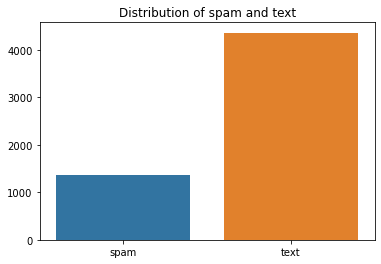

In [3]:
print("Shape = ",df.shape)

print("Columns= \n",df.dtypes)

spam = len(df[df['spam']==1])
text = len(df[df['spam']==0])
y = [spam, text]
x = ["spam","text"]
sns.barplot(x,y)
plt.title("Distribution of spam and text")
plt.show()

In [4]:
#drop duplicates
df = df.drop_duplicates()
print("shape after dropping duplciates: ", df.shape)

# check null values
print("There are null values: \n", df.isna().any())

shape after dropping duplciates:  (5695, 2)
There are null values: 
 text    False
spam    False
dtype: bool


# Text preprocessing

In [5]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [6]:
df["text"] = df["text"].str.lower() #to lower case
df["text"] = df["text"].str.replace('[^\w\s]','') #remove punctuation
df["text"] = df["text"].str.replace('&lt;/?.*?&gt;"," &lt;&gt;','') #remove tags
df["text"] = df["text"].str.replace('(\\W)+',' ') #remove special characters

df.head()

,text,spam
0,subject naturally irresistible your corporate ...,1
1,subject the stock trading gunslinger fanny is ...,1
2,subject unbelievable new homes made easy im wa...,1
3,subject 4 color printing special request addit...,1
4,subject do not have money get software cds fro...,1


In [7]:
text = df["text"].str.cat(sep=" ")
tokens = word_tokenize(text)
print("Total tokens:", len(tokens))

stop_words = stopwords.words('english') #get stopwords
stop_words+=['is','you','your','and', 'the', 'to', 'from', 'or', 'I', 'for', 'do', 'get', 'not', 'here', 'in', 'im', 'have', 'on', 're', 'new', 'subject']
stop_words = set(stop_words)



Total tokens: 1404994


In [8]:
#removing stop words and non-texts
tokens = [w for w in tokens if w not in stop_words and w.isalpha()]
print("Tokens after removing stopwrods and non-texts:", len(tokens))
vocabulary = set(tokens)
print("Total unique tokens (vocabulary):", len(vocabulary)) 

Tokens after removing stopwrods and non-texts: 773851
Total unique tokens (vocabulary): 33584


### Word Cloud 

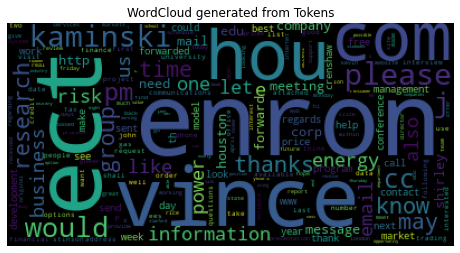

In [9]:
frequency_dist = nltk.FreqDist(tokens)
wordcloud = WordCloud(width = 400, height = 200).generate_from_frequencies(frequency_dist)
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("WordCloud generated from Tokens")
plt.show()

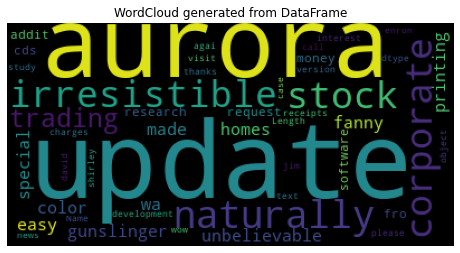

In [10]:
wordcloud = WordCloud(width = 400, height = 200, stopwords = stop_words).generate(str(df['text']))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.title("WordCloud generated from DataFrame")
plt.show()

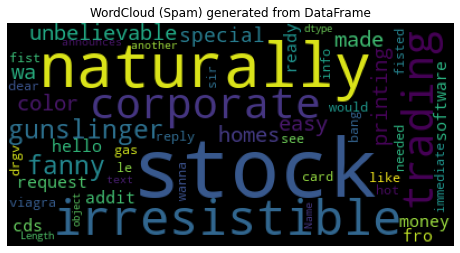

In [11]:
df1 = df[df["spam"]==1]
wordcloud = WordCloud(width = 400, height = 200, stopwords = stop_words).generate(str(df1['text']))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.title("WordCloud (Spam) generated from DataFrame")
plt.show()

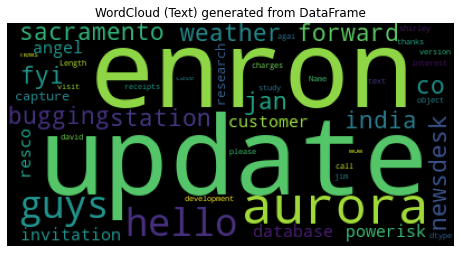

In [12]:
df1 = df[df["spam"]==0]
wordcloud = WordCloud(width = 400, height = 200, stopwords = stop_words).generate(str(df1['text']))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.title("WordCloud (Text) generated from DataFrame")
plt.show()

# Spam detection model 

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import ensemble 
from sklearn.metrics import classification_report, accuracy_score

### Bag of words 

In [14]:
text_vec = CountVectorizer().fit_transform(df['text'])
X_train, X_test, y_train, y_test = train_test_split(text_vec, df['spam'], test_size = 0.30, random_state = 42, shuffle = True)

### Gradient Boosting

In [15]:
classifier = ensemble.GradientBoostingClassifier(
    n_estimators = 100, #how many decision trees to build
    learning_rate = 0.5, #learning rate
    max_depth = 6
)

In [16]:
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1269
           1       0.98      0.91      0.94       440

    accuracy                           0.97      1709
   macro avg       0.97      0.95      0.96      1709
weighted avg       0.97      0.97      0.97      1709



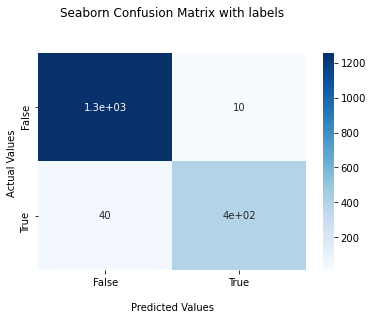

In [18]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
import seaborn as sns

ax = sns.heatmap(cnf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### TF-IDF Vectorizer 

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [20]:
vectorizer = TfidfVectorizer(stop_words=stop_words)
tfidf_matrix = vectorizer.fit_transform(df["text"])
print(tfidf_matrix.shape)

(5695, 37183)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(text_vec, df['spam'], test_size = 0.30, random_state = 42, shuffle = True)

### Multinominal NB

In [22]:
## multinominalNB model. As its best for text/document classifications
clf = MultinomialNB()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1269
           1       0.98      0.99      0.98       440

    accuracy                           0.99      1709
   macro avg       0.99      0.99      0.99      1709
weighted avg       0.99      0.99      0.99      1709



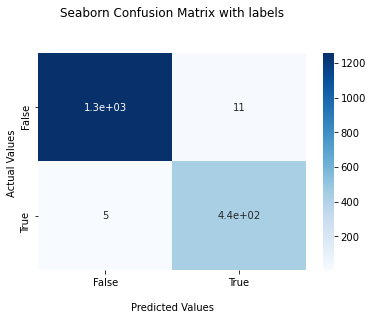

In [23]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
import seaborn as sns

ax = sns.heatmap(cnf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()